<a href="https://colab.research.google.com/github/Tej-v/TripAdvisor-Dataset/blob/main/Trip_Advisor_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Title: TripAdvisor Hotel Review Analysis: Exploratory Data Analysis (EDA) and Insights**

**Introduction:**
This project focuses on performing Exploratory Data Analysis (EDA) and data preprocessing on a dataset of hotel reviews from TripAdvisor. The goal is to uncover key insights into guest feedback, identify trends over time, and explore how different factors like review length and location impact hotel ratings.

By leveraging Python’s data analysis libraries, I cleaned, transformed, and analyzed the dataset to produce visualizations and statistical summaries. These insights could be useful for hotels looking to improve customer satisfaction, as well as for guests seeking a better understanding of hotel experiences.

**Dataset Overview:**
The dataset contains 4,680 rows and 6 columns, representing various reviews from TripAdvisor users for different hotels. Each row represents a guest review, and the columns provide details about the hotel, the guest's rating, and the review itself.

**Key columns in the dataset include:**

- **Name:** The name of the hotel.
- **Area:** The location of the hotel, typically a city or region.
- **Review_Date**: The date when the review was submitted.
- **Rating (Out of 10):** The numerical rating assigned by the guest, on a scale from 1 to 10.
- **Rating Attribute:** A brief textual summary of the guest’s review.
- **Review_Text:** The full text of the guest's review, which provides further context about their experience.
This dataset was preprocessed to handle missing values, duplicates, and formatting issues before being analyzed.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hotel_reviews.csv to hotel_reviews.csv


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset (Trip Advisor)

In [7]:
df = pd.read_csv('hotel_reviews.csv')

In [8]:
print(df.head()) #display first few rows of the datset

   Index             Name                  Area Review_Date  \
0      0  Hotel The Pearl  Paharganj, New Delhi      Jul-23   
1      1  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
2      2  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
3      3  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
4      4  Hotel The Pearl  Paharganj, New Delhi      Aug-23   

                            Rating_attribute  Rating(Out of 10)  \
0                 Best budget friendly hotel                9.0   
1                              Amazing place                9.0   
2               Overall good stay. Economic.                9.0   
3                                     Lovely                9.0   
4  Great hotel Great staff and great staying                9.0   

                                         Review_Text  
0  Hotel the pearl is perfect place to stay in De...  
1  Location of the hotel is perfect. The hotel is...  
2                             Location, Indian food. 

#Inspecting the dataset

Goal = To understand the structure and contents of the dataset to identify potential issues or areas for cleaning.

In [ ]:
df.info() #Cheching the coloumns and their Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6994 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


This tells us:

There are 7,001 rows and 7 columns in the dataset.
All columns except Review_Text have no missing values.
The Review_Text column has 7 missing values (since it has 6,994 non-null entries).
Data types: The Index and Rating(Out of 10) columns are numerical (int64 and float64), while the rest are object types (which likely means strings).

#Checking for any missing values

In [10]:
df.isnull().sum()

,0
Index,0
Name,0
Area,0
Review_Date,0
Rating_attribute,0
Rating(Out of 10),0
Review_Text,7


This confirms that:

Only the Review_Text column has missing data, with 7 missing entries.

In [11]:
df.describe() #Checking Summary Statistics for numerical columns

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


This shows basic summary statistics for the numerical columns (Index and Rating(Out of 10)):

The mean rating is about 7.03, which suggests that on average, hotels receive fairly positive reviews.
The minimum rating is 1, and the maximum is 10.
The 25th percentile (first quartile) rating is 6, the median (50th percentile) rating is 8, and the 75th percentile is 9.
This gives us a general sense of the distribution of hotel ratings in the dataset.

#Handling Missing Data

In [14]:
df_cleaned = df.dropna(subset=['Review_Text'])

#Data Pre-Proccesing

In [15]:
df_cleaned = df_cleaned.drop(columns= ['Index']) #dropping Index column

In [16]:
print(df_cleaned.head())

              Name                  Area Review_Date  \
0  Hotel The Pearl  Paharganj, New Delhi      Jul-23   
1  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
2  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
3  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
4  Hotel The Pearl  Paharganj, New Delhi      Aug-23   

                            Rating_attribute  Rating(Out of 10)  \
0                 Best budget friendly hotel                9.0   
1                              Amazing place                9.0   
2               Overall good stay. Economic.                9.0   
3                                     Lovely                9.0   
4  Great hotel Great staff and great staying                9.0   

                                         Review_Text  
0  Hotel the pearl is perfect place to stay in De...  
1  Location of the hotel is perfect. The hotel is...  
2                             Location, Indian food.  
3  The location and the hotel itself is 

#Formatting Date Column to ensure it follows the Date-Time format

In [18]:
df_cleaned['Review_Date'] = pd.to_datetime(df_cleaned['Review_Date'], format= '%b-%y')

In [19]:
print(df_cleaned.head())

              Name                  Area Review_Date  \
0  Hotel The Pearl  Paharganj, New Delhi  2023-07-01   
1  Hotel The Pearl  Paharganj, New Delhi  2023-08-01   
2  Hotel The Pearl  Paharganj, New Delhi  2023-08-01   
3  Hotel The Pearl  Paharganj, New Delhi  2023-08-01   
4  Hotel The Pearl  Paharganj, New Delhi  2023-08-01   

                            Rating_attribute  Rating(Out of 10)  \
0                 Best budget friendly hotel                9.0   
1                              Amazing place                9.0   
2               Overall good stay. Economic.                9.0   
3                                     Lovely                9.0   
4  Great hotel Great staff and great staying                9.0   

                                         Review_Text  
0  Hotel the pearl is perfect place to stay in De...  
1  Location of the hotel is perfect. The hotel is...  
2                             Location, Indian food.  
3  The location and the hotel itself is 

#Checking for duplicates

In [21]:
duplicates = df_cleaned.duplicated().sum()

In [22]:
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 2314


#Removing Duplicates

In [24]:
df_cleaned = df_cleaned.drop_duplicates()

#Checking the shape of the dataset after removing the duplicates

In [26]:
print(df_cleaned.shape)

(4680, 6)


#Performing Exploratory Data Analysis

#Get initial insights into the dataset by performing basic descriptive statistics and visualizations.

In [27]:
df_cleaned.describe()

,Review_Date,Rating(Out of 10)
count,4680,4680.000000
mean,2023-03-08 08:32:00,6.961410
min,2020-09-01 00:00:00,1.000000
25%,2023-02-01 00:00:00,6.000000
50%,2023-05-01 00:00:00,8.000000
75%,2023-07-01 00:00:00,9.000000
max,2023-08-01 00:00:00,10.000000
std,NaN,2.907239


The mean rating is around 6.96, meaning most reviews are generally positive.
The minimum rating is 1, while the maximum rating is 10.
The 25th percentile is 6, and the 75th percentile is 9, showing a strong concentration of higher ratings.
However, the standard deviation (std) for Review_Date is NaN because datetime columns aren't meant for numerical summary statistics.

#Visualization

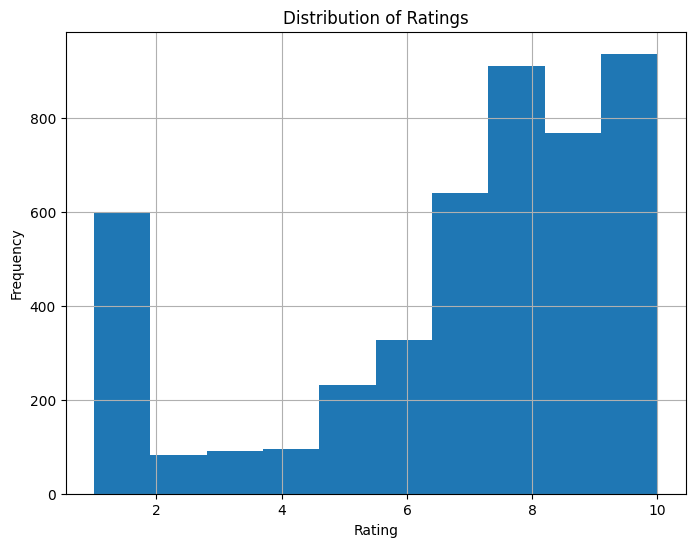

In [29]:
# Plot histogram for 'Rating(Out of 10)'
plt.figure(figsize=(8, 6))
df_cleaned['Rating(Out of 10)'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram provides a good overview of the distribution of ratings:
There is  a peak around ratings 9 and 10, indicating many guests gave high ratings to the hotels.
There's also a significant number of very low ratings around 1, which could indicate a subset of very dissatisfied customers.
There's a noticeable gap between the low and high ratings, with fewer reviews in the middle range (3-5 ratings).
This distribution suggests that reviews tend to be polarized, with guests either being very satisfied or quite dissatisfied.

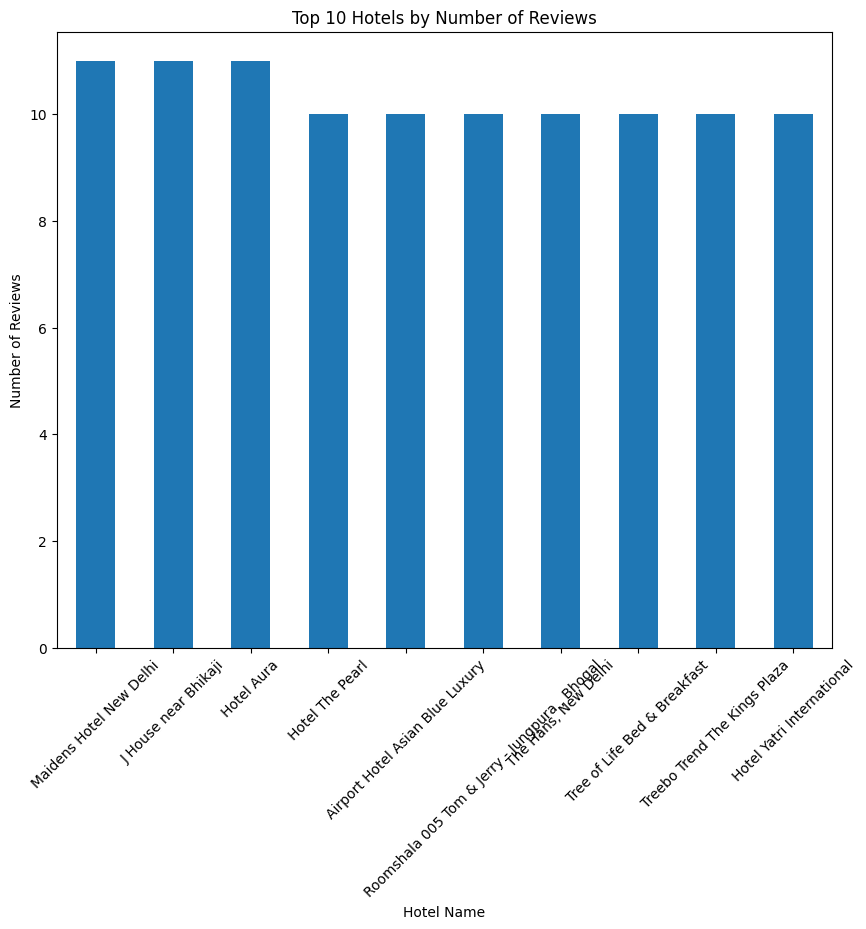

In [30]:
# Plot number of reviews per hotel
plt.figure(figsize=(10, 8))
df_cleaned['Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Hotels by Number of Reviews')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

The bar plot shows the top 10 hotels by the number of reviews. It looks like several hotels, such as Maidens Hotel, J House, Hotel Aura, and others, have received 10 or more reviews, indicating they are some of the most frequently reviewed properties in the dataset.

This visualization helps to quickly identify the most popular hotels in terms of guest feedback.

#Time Series of Reviews

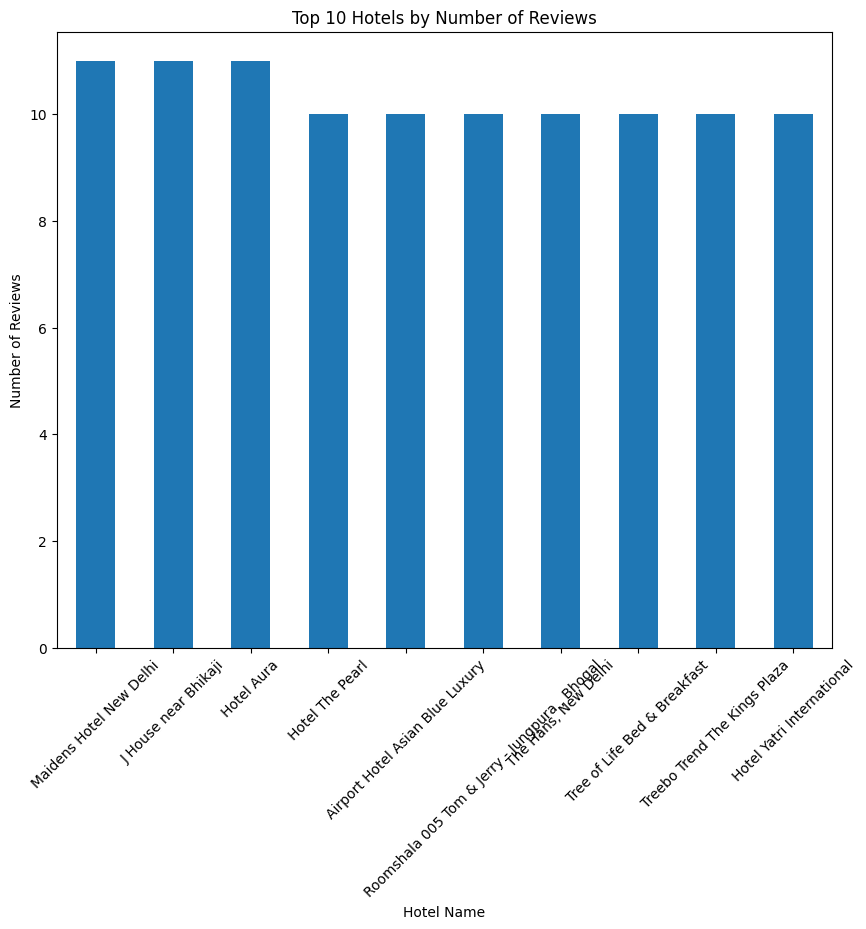

In [32]:
# Plot number of reviews per hotel
plt.figure(figsize=(10, 8))
df_cleaned['Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Hotels by Number of Reviews')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


This plot shows that the top 10 hotels have a similar number of reviews, with the most popular hotels receiving around 10 reviews each.

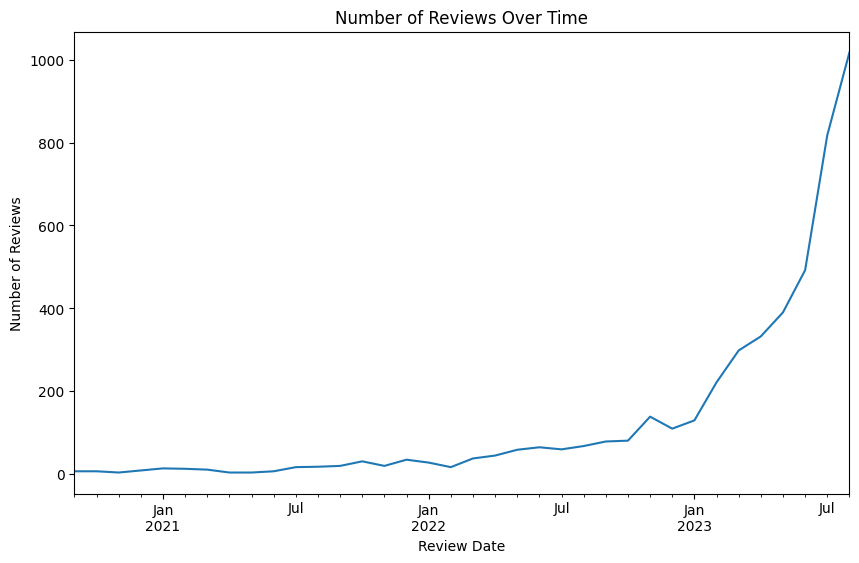

In [33]:
# Plot number of reviews over time
plt.figure(figsize=(10, 6))
df_cleaned.groupby(df_cleaned['Review_Date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.show()


The time series plot shows an interesting trend in the number of reviews over time:

For much of 2021 and early 2022, the number of reviews remained fairly low and stable.
Around mid-2022, the number of reviews started to increase significantly.
By 2023, the number of reviews surged rapidly, reaching over 1000 reviews by mid-year.
This sharp increase in reviews could be due to several factors, such as increased travel, marketing efforts, or the growing popularity of certain hotels during that period. It might be worth investigating further.

#Average Rating Over Time

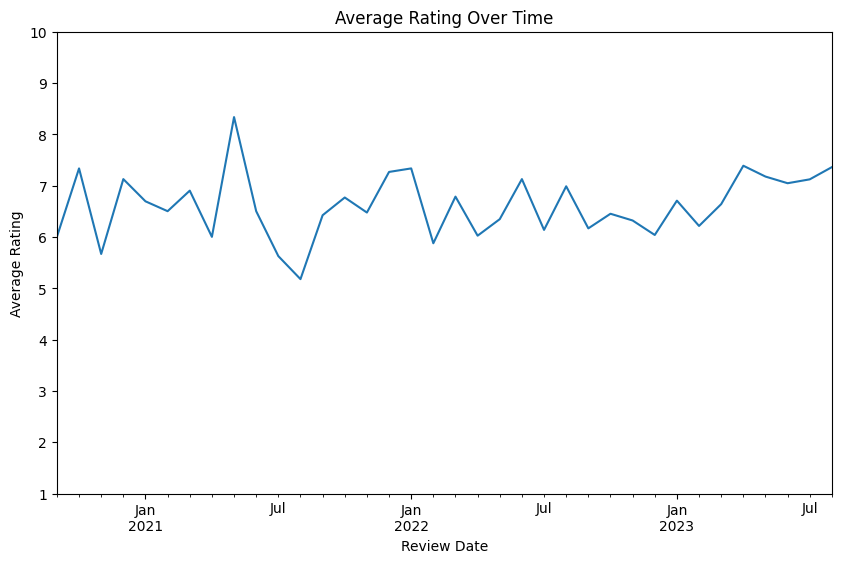

In [35]:
# Calculate the average rating per month
plt.figure(figsize=(10, 6))
df_cleaned.groupby(df_cleaned['Review_Date'].dt.to_period('M'))['Rating(Out of 10)'].mean().plot(kind='line')
plt.title('Average Rating Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.ylim(1, 10)  # Since ratings range from 1 to 10
plt.show()

Fluctuations: There are noticeable peaks and troughs in the ratings, with some months showing average ratings as high as 9 and others dropping closer to 5 or even below.
Initial Volatility: In the earlier part of the timeframe (2021), the average rating fluctuates more significantly.
Stabilization: As we move into 2022 and beyond, the ratings seem to stabilize, with fewer extreme highs and lows, especially closer to 2023.
Gradual Increase: Toward the middle and end of the timeframe (mid-2023), we observe a slow but consistent increase in the average rating, indicating improving guest satisfaction.
Possible Explanations:
Events or Changes: The volatility in earlier ratings could be due to external factors such as hotel service improvements, promotions, or even broader issues like the pandemic affecting customer experience.
Time of Year: The average rating could also fluctuate due to seasonal trends, such as holiday or peak travel times.


#Top 10 Hotels by Average Rating

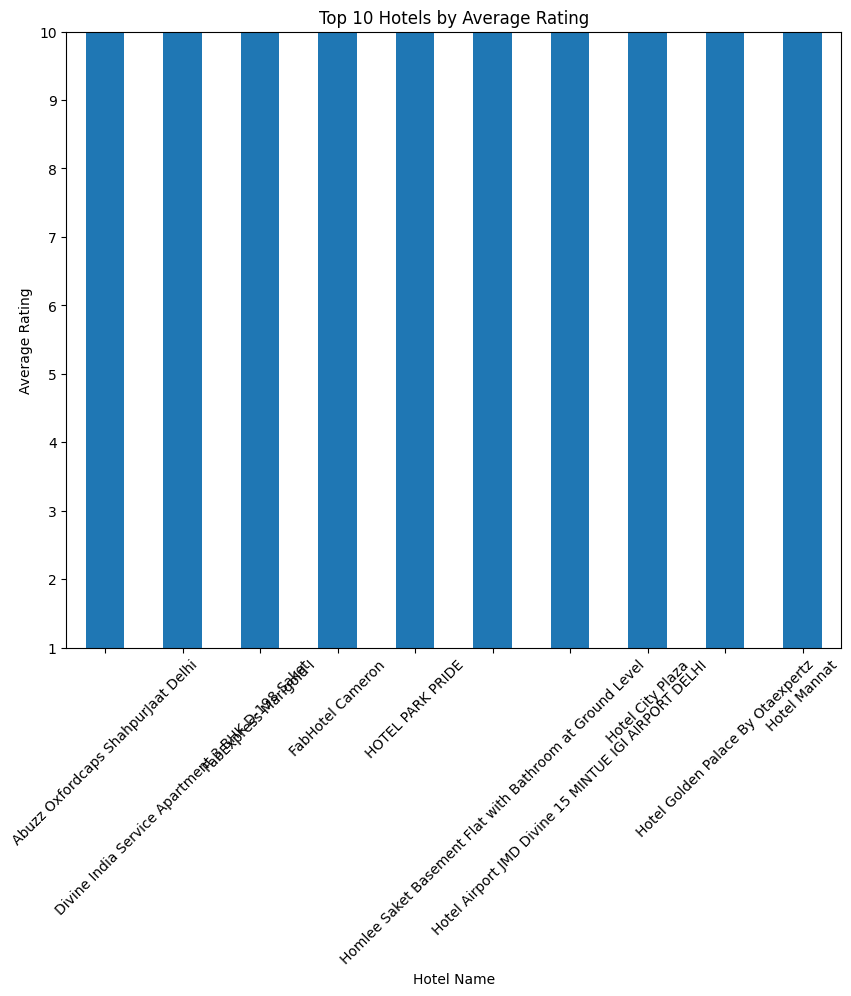

In [37]:
# Top 10 hotels by average rating
plt.figure(figsize=(10, 8))
df_cleaned.groupby('Name')['Rating(Out of 10)'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hotels by Average Rating')
plt.xlabel('Hotel Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(1, 10)  # To maintain consistency with the rating scale
plt.show()


The Top 10 Hotels by Average Rating plot reveals that these hotels all have an average rating of 10, indicating perfect scores from reviewers. This suggests that guests were extremely satisfied with their experience at these hotels.

Observations:
Perfect Scores: All hotels in this top 10 list have received perfect average ratings of 10, which could indicate either very high-quality service or perhaps a smaller sample size of reviews for these hotels.
Names of the Hotels: It's interesting to note the variety of names, suggesting that both budget accommodations and more premium hotels might have made the list.

#Ratings Distribution by Hotel Area

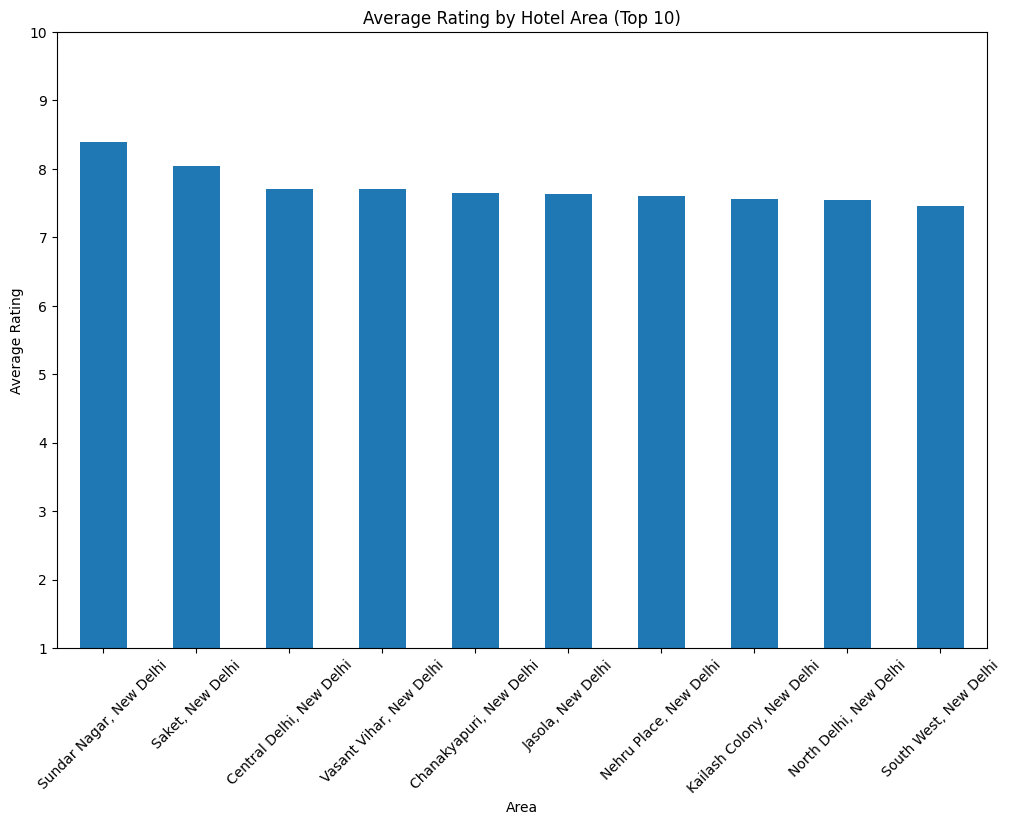

In [39]:
# Plot average rating by hotel area
plt.figure(figsize=(12, 8))
df_cleaned.groupby('Area')['Rating(Out of 10)'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Rating by Hotel Area (Top 10)')
plt.xlabel('Area')
plt.ylabel('Average Rating')
plt.ylim(1, 10)
plt.xticks(rotation=45)
plt.show()


#Review Count

In [46]:
df_cleaned[df_cleaned['Name'].isin(df_cleaned.groupby('Name')['Rating(Out of 10)'].mean().nlargest(10).index)]['Name'].value_counts()


,count
Name,
Hotel Airport JMD Divine 15 MINTUE IGI AIRPORT DELHI,2
Hotel Mannat,1
Hotel Golden Palace By Otaexpertz,1
Homlee Saket Basement Flat with Bathroom at Ground Level,1
HOTEL PARK PRIDE,1
FabHotel Cameron,1
Hotel City Plaza,1
FabExpress Marigold I,1
Divine India Service Apartment 3 BHK D-198 Saket,1


#Most Common Words in Reviews (Word Cloud)

In [41]:
!pip install wordcloud

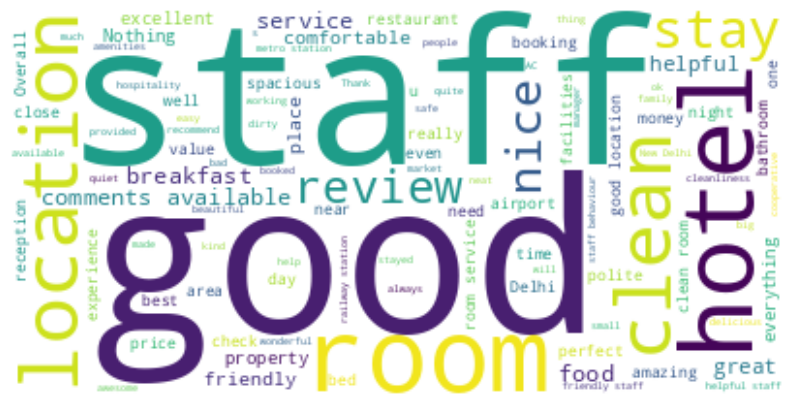

In [42]:
from wordcloud import WordCloud

# Combine all review text into one large string
text = " ".join(review for review in df_cleaned['Review_Text'])

# Create and plot word cloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The word cloud visualization provides a great overview of the most commonly used words in the reviews. Here are some key observations:

"Staff" and "Good" are the most prominent words, suggesting that reviewers frequently mention the hotel staff and often use "good" to describe their experience.
Other common words include "location," "clean," "room," "hotel," and "stay," which indicates that reviewers tend to focus on the cleanliness, location, and the overall hotel stay.
Words like "helpful," "nice," "breakfast," "comfortable," and "friendly" highlight specific positive attributes mentioned in reviews.
This word cloud helps reveal the factors that guests find important or notable during their stay. It seems that staff and cleanliness are major themes in the reviews, which could be key selling points for these hotels.

#Ratings vs Review Length

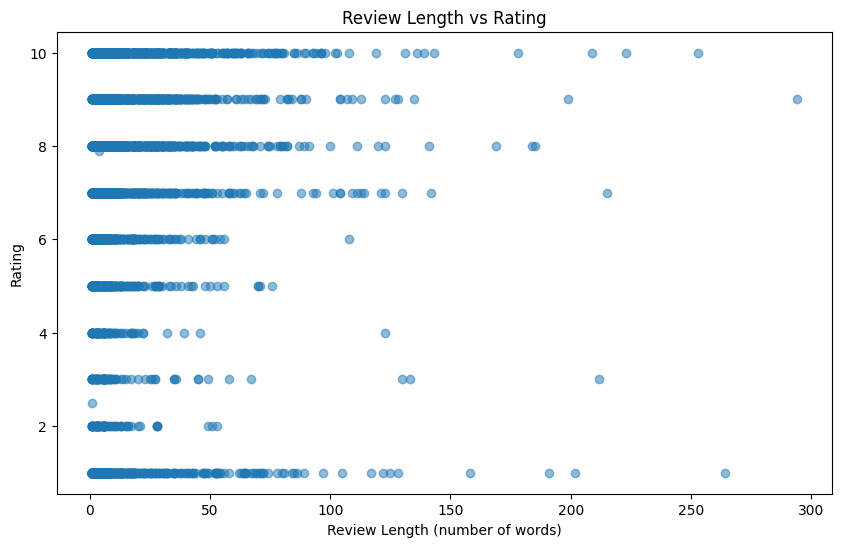

In [44]:
# Create a new column for review length
df_cleaned['Review_Length'] = df_cleaned['Review_Text'].apply(lambda x: len(x.split()))

# Scatter plot of rating vs review length
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Review_Length'], df_cleaned['Rating(Out of 10)'], alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Rating')
plt.show()


**Observations:**
*   Short Reviews are Common: Many reviews with few words (less than 50) appear
across all rating levels, from 1 to 10. This suggests that short reviews are very common, regardless of how positive or negative the review is.
* Higher Ratings for Longer Reviews: There seems to be a trend where longer reviews (more than 100 words) tend to have higher ratings (7-10). This could suggest that people who write longer reviews may tend to provide more thoughtful and positive feedback.
* Low Ratings with Short Reviews: Reviews with lower ratings (1-4) are often short, which might indicate that when people are dissatisfied, they tend to leave brief reviews.
